In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the data
df = pd.read_csv('rolling_stones_spotify.csv')

# Inspect the data
print(df.head())
print(df.info())
print(df.describe())

# Check for duplicates
df = df.drop_duplicates()

# Check for missing values
print(df.isnull().sum())

# Fill or remove missing values
# For simplicity, let's remove rows with missing values
df = df.dropna()

# Detect and handle outliers if necessary
# For this example, we assume no complex outlier handling is needed

# Further cleaning (e.g., correcting erroneous entries)
# Assume data is clean after removing missing values and duplicates

   Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy 

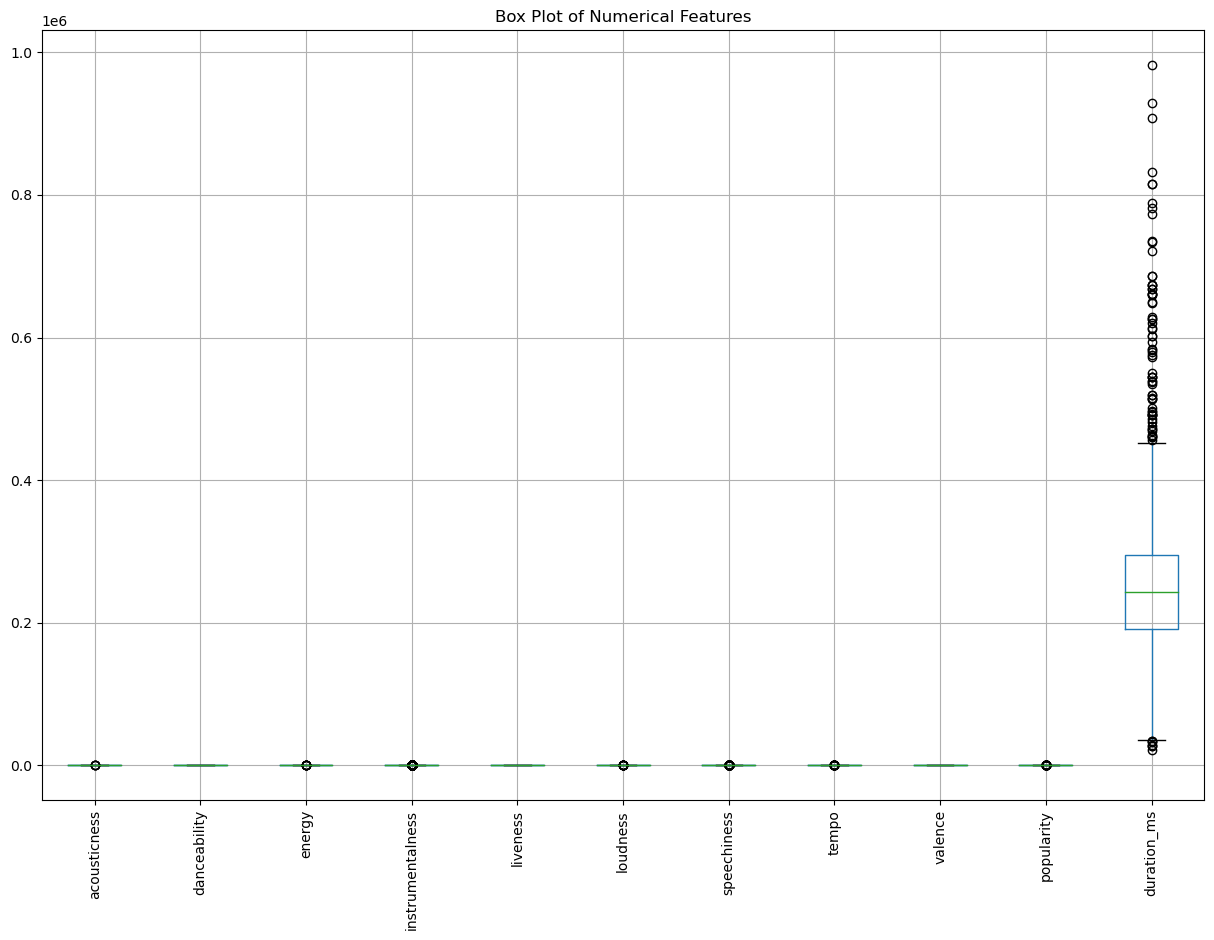

In [4]:


# List of numerical features to check for outliers
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                      'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']

# Detecting outliers using Box Plots
plt.figure(figsize=(15, 10))
df[numerical_features].boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Features')
plt.show()

In [7]:
# Detecting outliers using Z-Score
from scipy import stats

z_scores = np.abs(stats.zscore(df['duration_ms']))
print(f"Z-Scores:\n{z_scores}")

# Setting a threshold for identifying outliers
threshold = 3
outliers_z = np.where(z_scores > threshold)
print(f"Outliers detected by Z-Score:\n{outliers_z}")

Z-Scores:
0       1.930719
1       0.042138
2       0.050079
3       0.444539
4       0.437392
          ...   
1605    0.957125
1606    0.115148
1607    0.753985
1608    1.256295
1609    0.632970
Name: duration_ms, Length: 1610, dtype: float64
Outliers detected by Z-Score:
(array([   8,   15,   80,  111,  138,  182,  183,  197,  220,  297,  325,
        350,  433,  460,  467,  482,  537,  540,  564,  568,  571,  573,
        574,  582,  585,  587,  588,  638,  650, 1117, 1148, 1168, 1175,
       1413, 1419, 1433], dtype=int64),)


In [8]:

df_transformed = df.copy()
df_transformed['duration_ms'] = np.log1p(df_transformed['duration_ms'])

# Inspect the transformed data
print(df_transformed.describe())

        Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.2334

In [10]:
z_scores = np.abs(stats.zscore(df_transformed['duration_ms']))
print(f"Z-Scores:\n{z_scores}")

# Setting a threshold for identifying outliers
threshold = 3
outliers_z = np.where(z_scores > threshold)
print(f"Outliers detected by Z-Score:\n{outliers_z}")

Z-Scores:
0       3.936429
1       0.150393
2       0.246243
3       0.618926
4       0.612649
          ...   
1605    1.079904
1606    0.071785
1607    0.749249
1608    1.664768
1609    0.571389
Name: duration_ms, Length: 1610, dtype: float64
Outliers detected by Z-Score:
(array([   0,  220,  297,  325,  422,  460,  482,  537,  546,  547,  553,
        739,  756,  807,  818,  839,  850, 1223], dtype=int64),)


In [11]:
# Detecting outliers using Z-Score for each numerical feature
outliers = {}
for feature in numerical_features:
    z_scores = np.abs(stats.zscore(df[feature]))
    threshold = 3
    outliers[feature] = np.where(z_scores > threshold)

print("Outliers detected by Z-Score:")
for feature, outlier_indices in outliers.items():
    print(f"{feature}: {outlier_indices}")

Outliers detected by Z-Score:
acousticness: (array([165, 807, 818, 997], dtype=int64),)
danceability: (array([], dtype=int64),)
energy: (array([ 807,  818, 1118, 1313, 1325, 1333, 1369], dtype=int64),)
instrumentalness: (array([0], dtype=int64),)
liveness: (array([], dtype=int64),)
loudness: (array([ 300,  328,  546,  739,  756,  807,  818, 1118, 1186, 1310, 1322,
       1405, 1416, 1430], dtype=int64),)
speechiness: (array([  81,  190,  201,  212,  213,  217,  280,  281,  284,  286,  308,
        309,  312,  314,  502,  553,  558,  600,  635,  646,  647,  805,
        981, 1176, 1182, 1267], dtype=int64),)
tempo: (array([1553, 1565], dtype=int64),)
valence: (array([], dtype=int64),)
popularity: (array([ 684,  862,  872,  893,  901, 1023, 1043, 1120, 1122, 1123, 1248,
       1256, 1257, 1357, 1403, 1406, 1472], dtype=int64),)
duration_ms: (array([   8,   15,   80,  111,  138,  182,  183,  197,  220,  297,  325,
        350,  433,  460,  467,  482,  537,  540,  564,  568,  571,  573,
  

In [ ]:
### i can see alot of skewness and ourliers in duration_ms

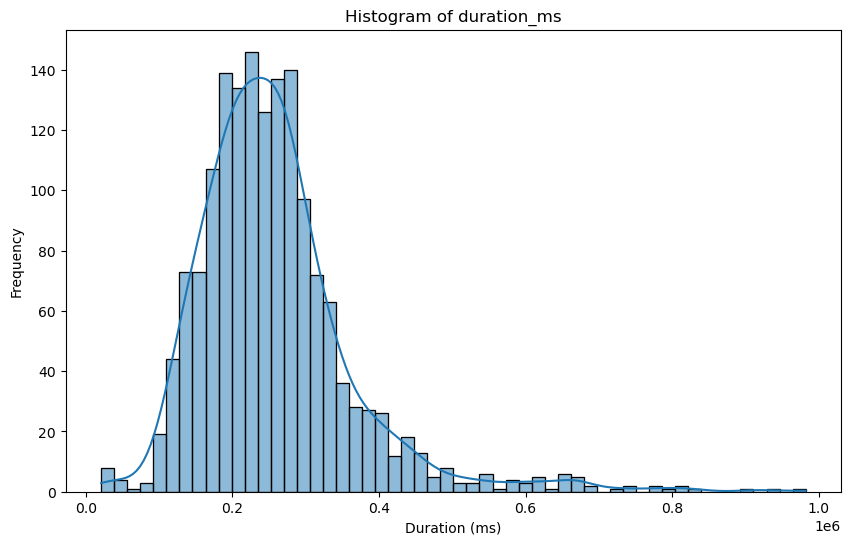

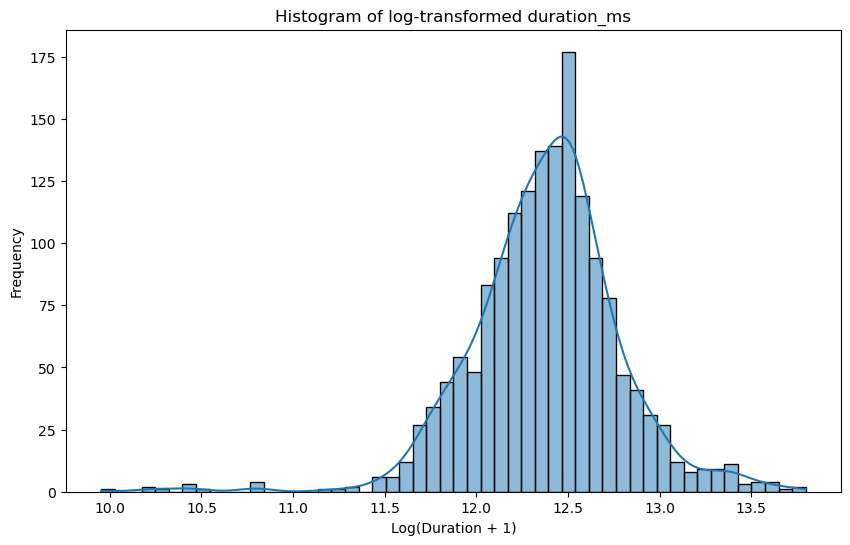

In [13]:
# Visualize the distribution of duration_ms
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_ms'], kde=True)
plt.title('Histogram of duration_ms')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()


df['duration_ms_log'] = np.log1p(df['duration_ms'])

# Visualize the distribution of the transformed column
plt.figure(figsize=(10, 6))
sns.histplot(df_transformed['duration_ms'], kde=True)
plt.title('Histogram of log-transformed duration_ms')
plt.xlabel('Log(Duration + 1)')
plt.ylabel('Frequency')
plt.show()

In [14]:
df['duration_ms'] = np.log1p(df['duration_ms'])

In [17]:
z_scores = np.abs(stats.zscore(df['duration_ms']))
print(f"Z-Scores:\n{z_scores}")

# Setting a threshold for identifying outliers
threshold = 5
outliers_z = np.where(z_scores > threshold)
print(f"Outliers detected by Z-Score:\n{outliers_z}")

Z-Scores:
0       3.936429
1       0.150393
2       0.246243
3       0.618926
4       0.612649
          ...   
1605    1.079904
1606    0.071785
1607    0.749249
1608    1.664768
1609    0.571389
Name: duration_ms, Length: 1610, dtype: float64
Outliers detected by Z-Score:
(array([546, 739, 756, 839], dtype=int64),)


In [18]:

print(df.head(20))

    Unnamed: 0                               name               album  \
0            0         Concert Intro Music - Live  Licked Live In NYC   
1            1         Street Fighting Man - Live  Licked Live In NYC   
2            2                 Start Me Up - Live  Licked Live In NYC   
3            3        If You Can't Rock Me - Live  Licked Live In NYC   
4            4                  Don’t Stop - Live  Licked Live In NYC   
5            5                  Monkey Man - Live  Licked Live In NYC   
6            6                       Angie - Live  Licked Live In NYC   
7            7                Let It Bleed - Live  Licked Live In NYC   
8            8            Midnight Rambler - Live  Licked Live In NYC   
9            9               Tumbling Dice - Live  Licked Live In NYC   
10          10          Band Introductions - Live  Licked Live In NYC   
11          11               Thru And Thru - Live  Licked Live In NYC   
12          12                       Happy - Live  

In [19]:
# lets check for scale issue 
summary_stats = df.describe()
print(summary_stats)

        Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.2334

In [27]:

# Select columns to be scaled (excluding columns already on a 0 to 1 scale)
columns_to_scale = ['loudness', 'tempo','duration_ms','popularity']

# Create a scaler object
scaler = StandardScaler()

# Apply scaling
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [28]:
# lets check for scale issue 
summary_stats = df.describe()
print(summary_stats)

        Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness         tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1.610000e+03   
mean           0.164170     0.49173     0.000000     0.069512  8.826618e-18   
std            0.276249     0.34910     1.000311     0.051631  1.0003

In [29]:
print(df.head(20))


    Unnamed: 0                               name               album  \
0            0         Concert Intro Music - Live  Licked Live In NYC   
1            1         Street Fighting Man - Live  Licked Live In NYC   
2            2                 Start Me Up - Live  Licked Live In NYC   
3            3        If You Can't Rock Me - Live  Licked Live In NYC   
4            4                  Don’t Stop - Live  Licked Live In NYC   
5            5                  Monkey Man - Live  Licked Live In NYC   
6            6                       Angie - Live  Licked Live In NYC   
7            7                Let It Bleed - Live  Licked Live In NYC   
8            8            Midnight Rambler - Live  Licked Live In NYC   
9            9               Tumbling Dice - Live  Licked Live In NYC   
10          10          Band Introductions - Live  Licked Live In NYC   
11          11               Thru And Thru - Live  Licked Live In NYC   
12          12                       Happy - Live  

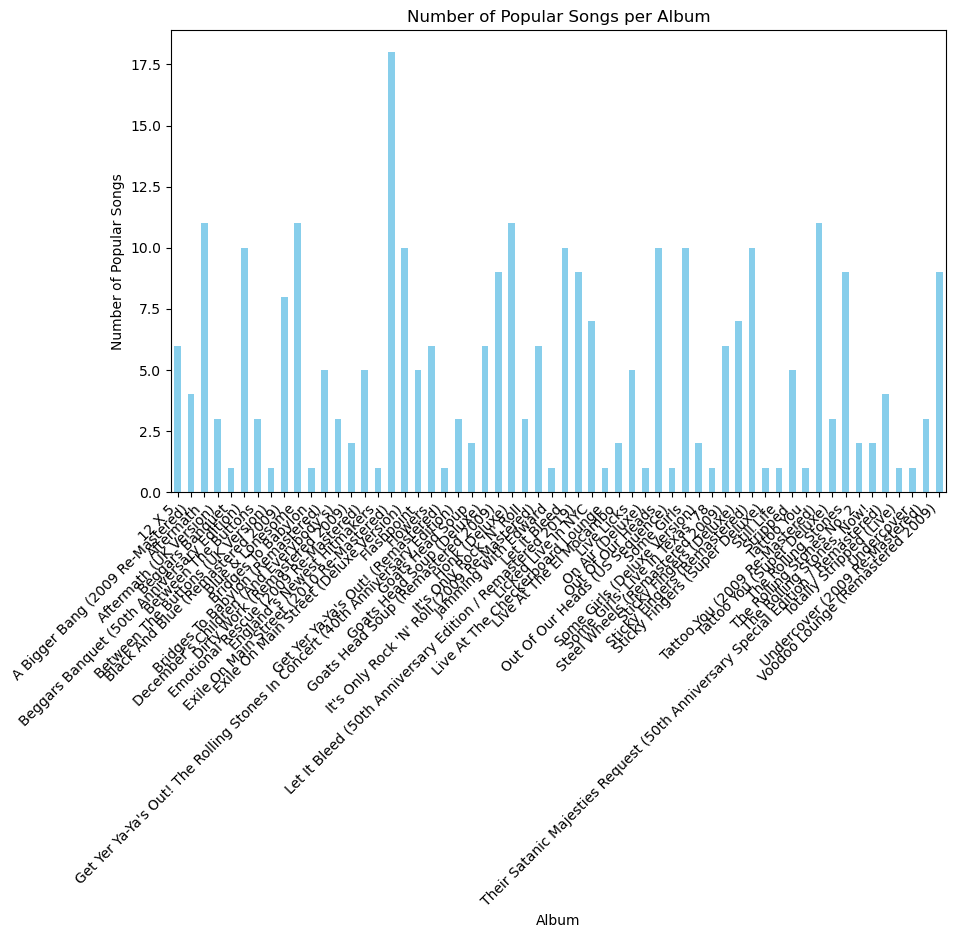

album
Exile On Main Street (2010 Re-Mastered)    18
Aftermath                                  11
dtype: int64

In [30]:



# o	Use appropriate visualizations to find out which two albums should be recommended to anyone based on the number of popular songs in an album.
popularity_threshold = 0.8

popular_songs_per_album = df[df['popularity'] > popularity_threshold].groupby('album').size()


plt.figure(figsize=(10, 6))
popular_songs_per_album.plot(kind='bar', color='skyblue')
plt.title('Number of Popular Songs per Album')
plt.xlabel('Album')
plt.ylabel('Number of Popular Songs')
plt.xticks(rotation=45, ha='right')
plt.show()

top_two_albums = popular_songs_per_album.nlargest(2)
top_two_albums

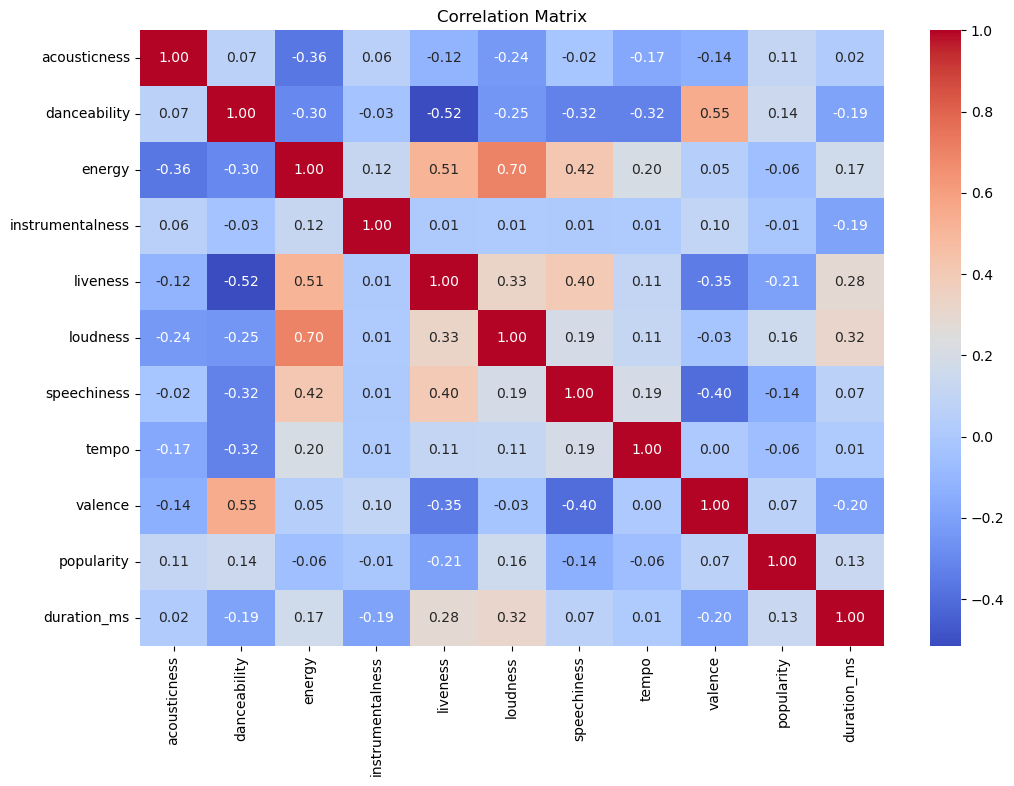

In [33]:
###o	Perform exploratory data analysis to dive deeper into different features of songs and identify the pattern.


import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
numeric_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']
df_numeric = df[numeric_features]
correlation_matrix = df_numeric.corr()


# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
###there's no strong linear relationship between popularity and other features. 

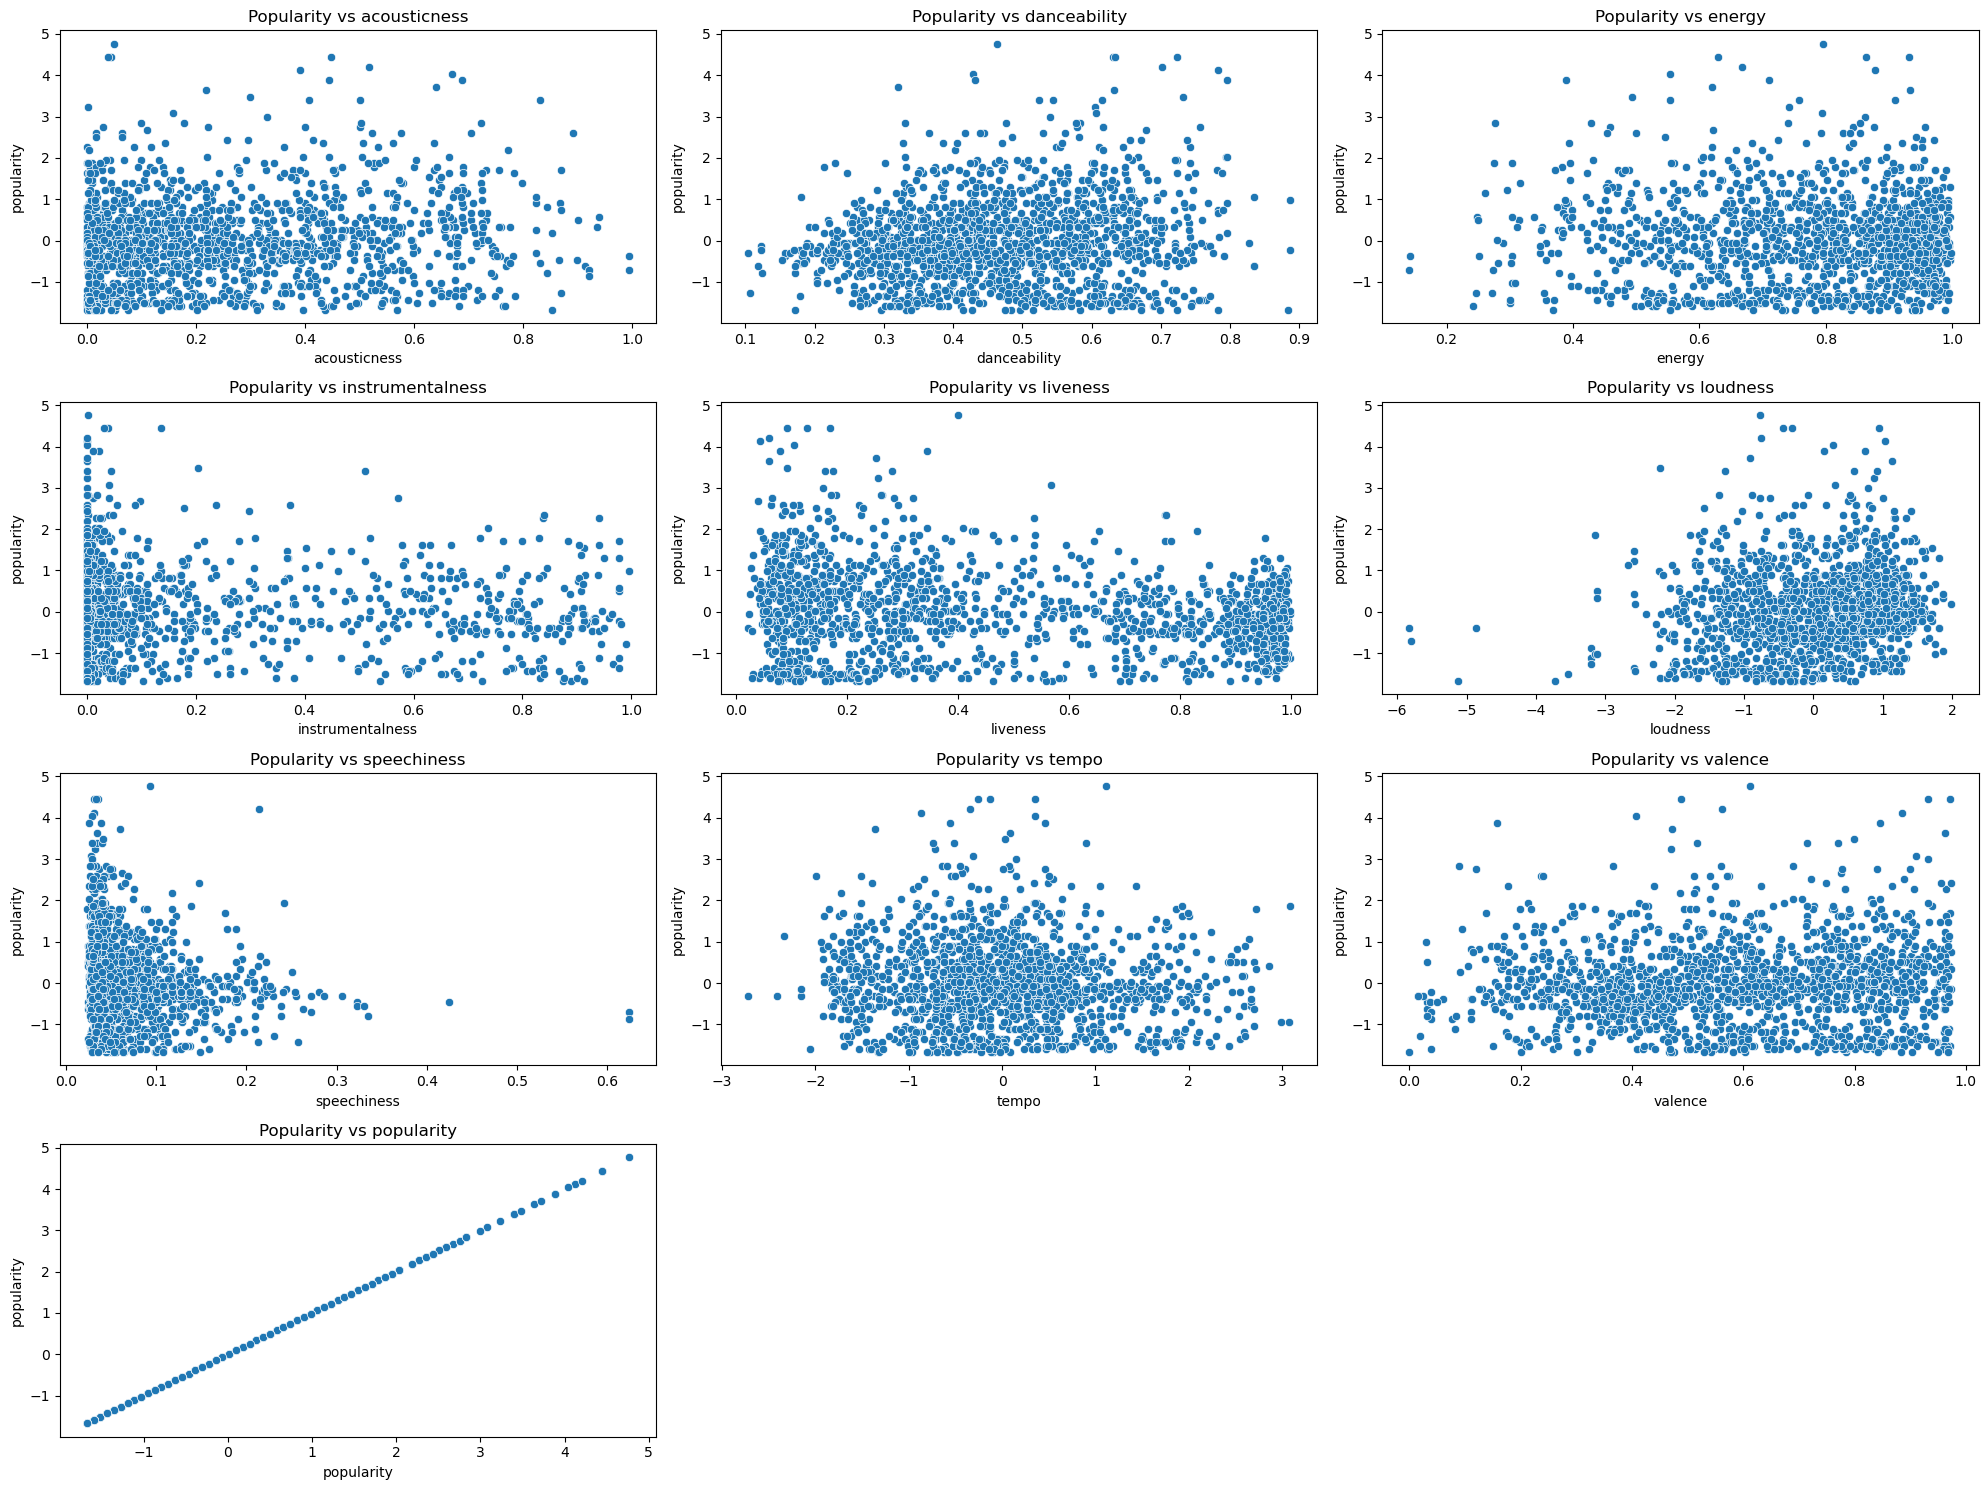

In [34]:
# Scatter plots to identify correlations with popularity
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features[:-1]):  # excluding popularity itself
    plt.subplot(4, 3, i+1)
    sns.scatterplot(x=df_numeric[feature], y=df_numeric['popularity'])
    plt.title(f'Popularity vs {feature}')
plt.tight_layout()
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


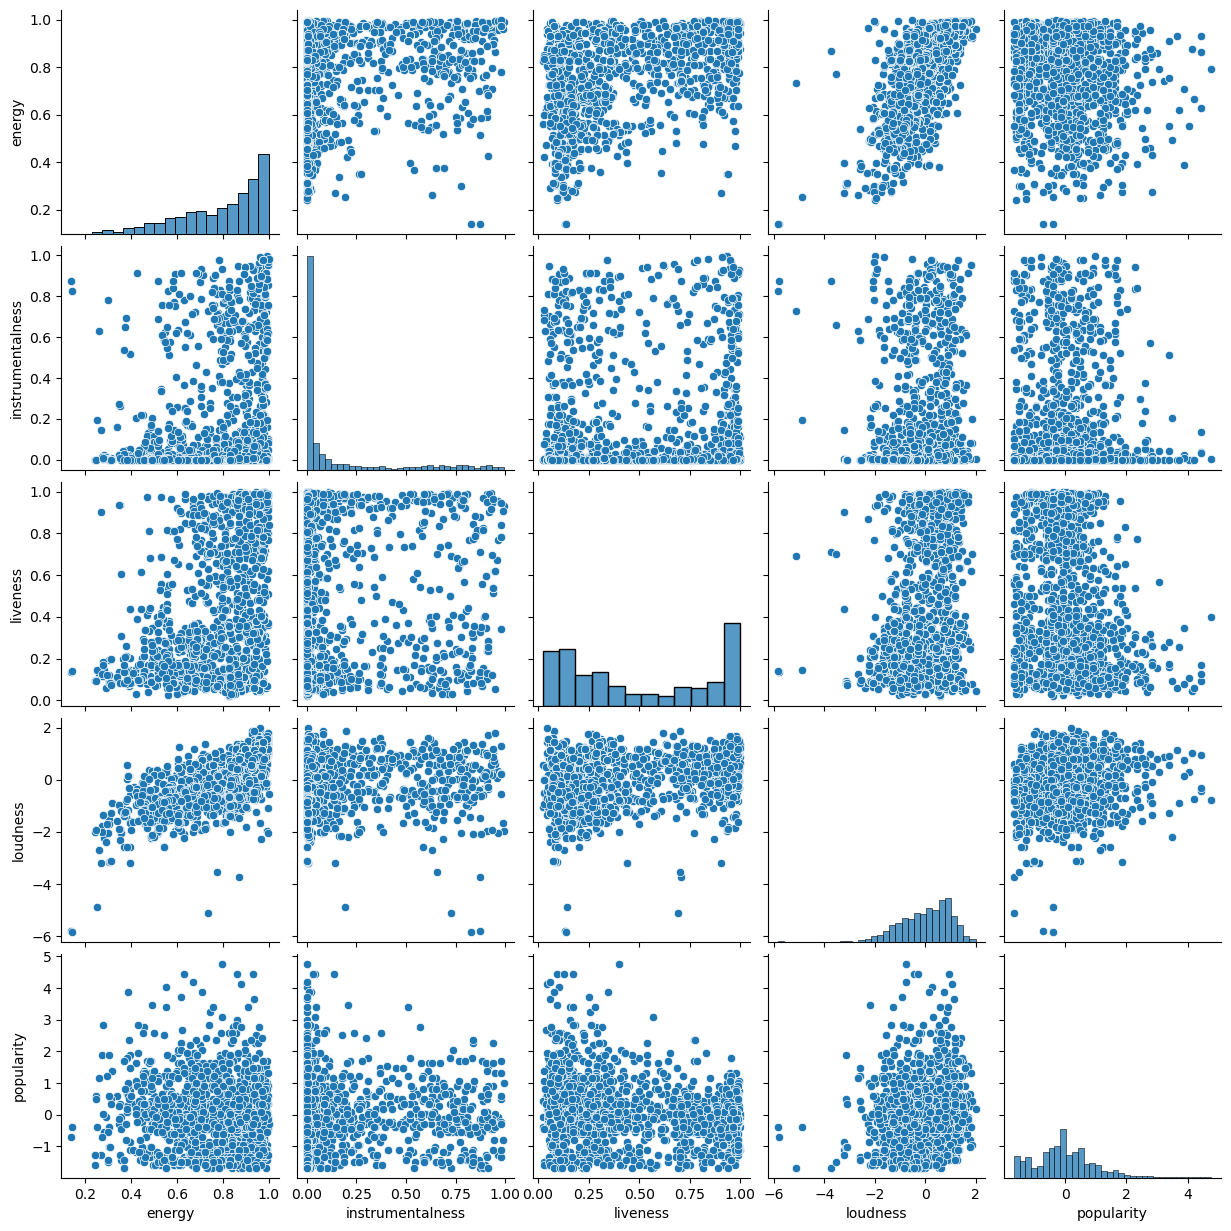

In [39]:
# Pair plot for selected features
selected_features = ['energy','instrumentalness', 'liveness', 'loudness', 'popularity']
sns.pairplot(df_numeric[selected_features])
plt.show()

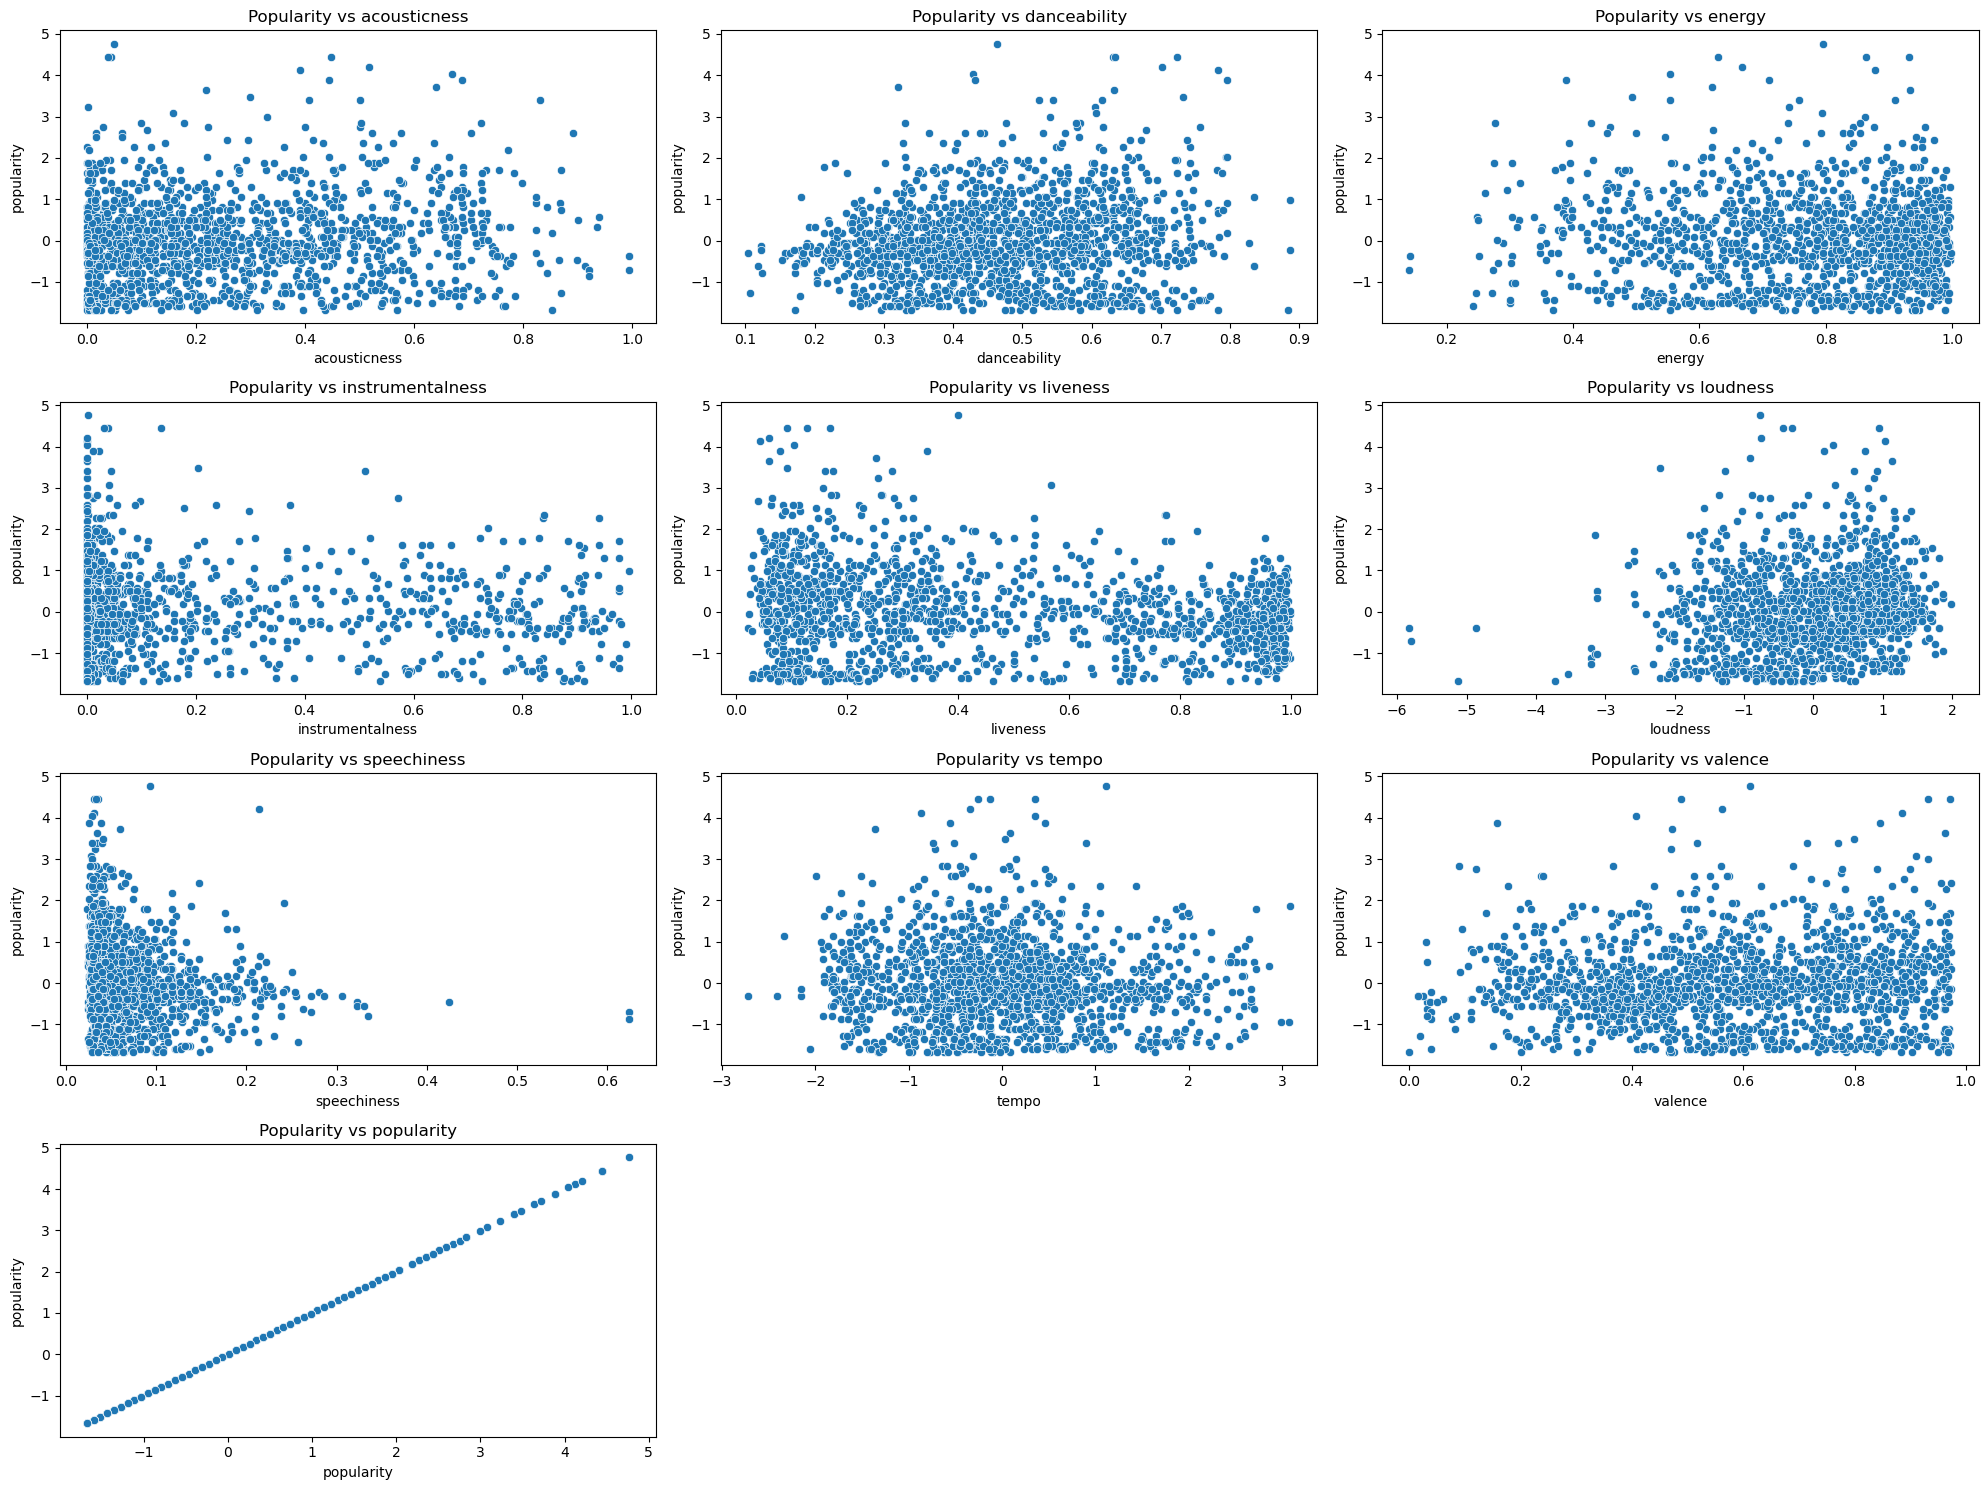

In [41]:

numeric_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']
df_numeric = df[numeric_features]

# Scatter plots to identify correlations with popularity
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features[:-1]):  # excluding popularity itself
    plt.subplot(4, 3, i+1)
    sns.scatterplot(x=df_numeric[feature], y=df_numeric['popularity'])
    plt.title(f'Popularity vs {feature}')
plt.tight_layout()
plt.show()

In [ ]:
###o	Discover how a song's popularity relates to various factors and how this has changed over time

###Popularity vs Danceability:

###Trend: Check if more danceable songs tend to have higher popularity
###t's possible that the audience prefers songs with moderate levels of danceability and popularity


###Popularity vs Speechness:
###there might not be a strong relationship between speechiness and popularity


###Popularity vs Valence
###popularity indicate lower levels for songs with valence themes,

In [42]:
##o	Comment on the importance of dimensionality reduction techniques, share your ideas and explain your observations.

print(df.head(5))



   Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy 

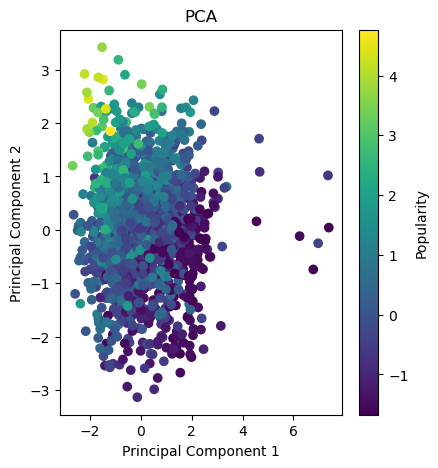

In [45]:

X = df[numeric_features]

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)



# Plot PCA results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['popularity'], cmap='viridis')
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Popularity')


In [48]:
# Get the loadings (coefficients) of the original features in the principal components
loadings = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings, columns=numeric_features, index=['PC1', 'PC2'])  # Adjust index based on the number of components

# Display the loadings
print("Loadings of features in each principal component:")
print(loadings_df)

Loadings of features in each principal component:
     acousticness  danceability    energy  instrumentalness  liveness  \
PC1      0.022583      0.030381 -0.075829          0.022815 -0.090770   
PC2      0.053669      0.052360 -0.054146         -0.007308 -0.091166   

     loudness  speechiness     tempo   valence  popularity  duration_ms  
PC1 -0.662208    -0.005978 -0.152392  0.021835   -0.373287    -0.618432  
PC2 -0.149072    -0.013328 -0.805367  0.009866    0.556569     0.046894  


In [ ]:
####For PC1:

#Acousticness, danceability, instrumentalness, and tempo have relatively small loadings, indicating that they contribute less to PC1.
#Energy, liveness, loudness, and popularity have larger negative loadings, suggesting that they are inversely related to PC1.
#Duration_ms has the largest negative loading, indicating a strong inverse relationship with PC1.
#For PC2:

#Acousticness, danceability, energy, and valence have relatively small loadings, indicating that they contribute less to PC2.
#Loudness and tempo have moderate negative loadings, suggesting that they are inversely related to PC2.
#Speechiness has a small negative loading, indicating a weak inverse relationship with PC2.
#Popularity has the largest positive loading, indicating a strong positive relationship with PC2.


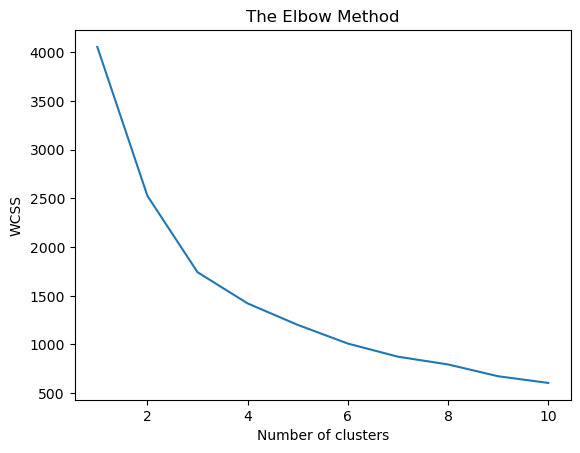

In [52]:
##•	Perform Cluster Analysis:
#o	Identify the right number of clusters
#o	Use appropriate clustering algorithm
#o	Define each cluster based on the features




wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    model.fit(X_pca)
    wcss.append(model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

In [60]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

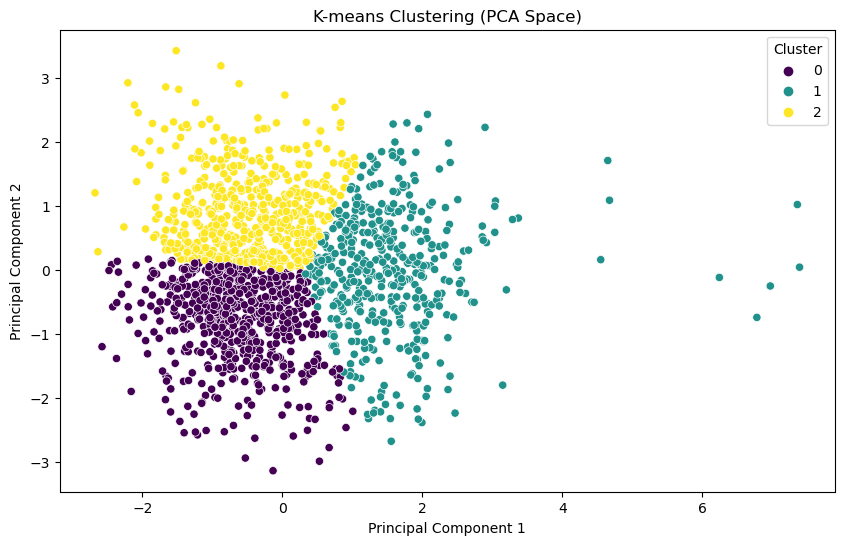

   Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy 

In [61]:


# Visualize Clusters
# Convert PCA-reduced data to DataFrame for visualization
clustered_data = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
clustered_data['Cluster'] = clusters

# Plot clusters in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=clustered_data, palette='viridis', legend='full')
plt.title('K-means Clustering (PCA Space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# add cluster to my data 
df['Cluster'] = clusters

# Display the updated dataset with cluster labels
print(df.head())


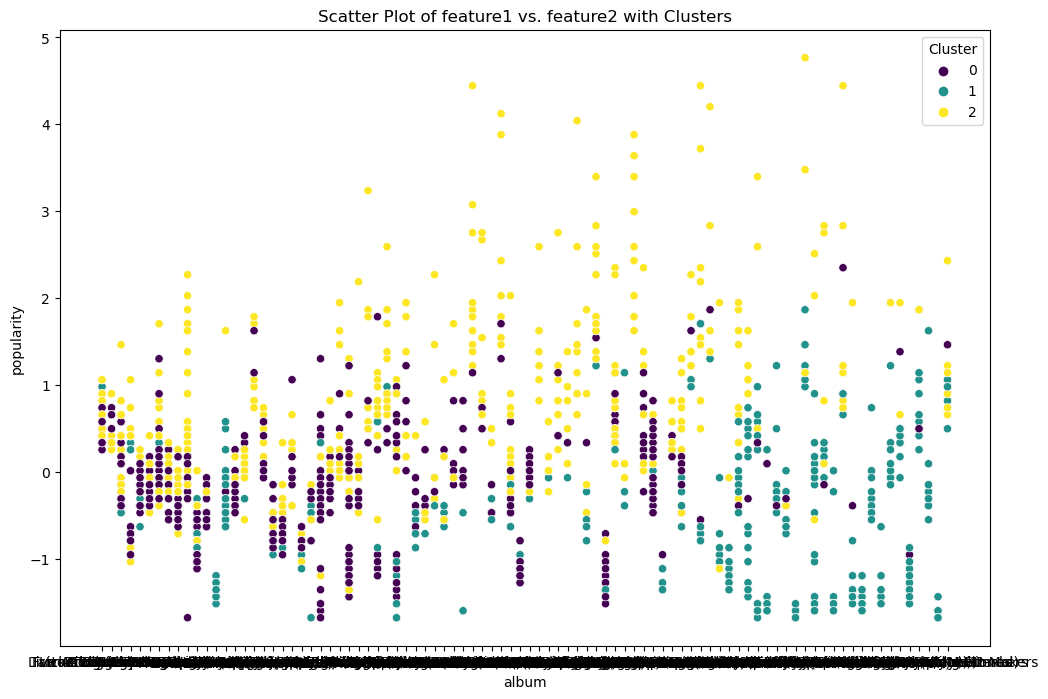

In [63]:
# Visualize clusters using scatter plots for individual pairs of features
plt.figure(figsize=(12, 8))
sns.scatterplot(x='album', y='popularity', hue='Cluster', data=df, palette='viridis')
plt.title('Scatter Plot of feature1 vs. feature2 with Clusters')
plt.xlabel('album')
plt.ylabel('popularity')
plt.show()